# Standardising Day and Night Images
The dataset I am using has 200 RGB colour images, with 120 each for training and 80 each for testing.<br>
<br>
Here I will build a classifier to accurately label images as either day or night, relying on finding distinguishing
feature between the two types.
### Import resources

In [1]:
import os
import glob

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Loading the testing and training data
### Define load_dataset function

In [2]:
def load_dataset(dir_name):
    img_classes = glob.glob(os.path.join(dir_name, '*', ''))
    img_list = []
    
    for img_class in img_classes:
        imgs = glob.glob(os.path.join(img_class, '*'))
        
        for img in imgs:
            if img is not None:
                img = mpimg.imread(img)
                img_list.append((img, img_class[len(dir_name):-1]))
                
    return img_list

### Load the datasets

In [3]:
train_dir = 'data/train/'
test_dir = 'data/test/'

train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)

### Visualise some data

Shape:  (458, 800, 3)
Label:  day


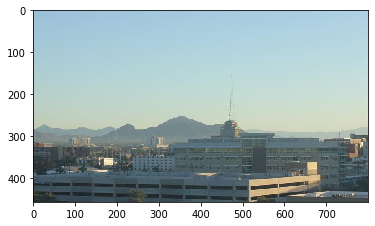

In [4]:
selected_image = train_data[0]
image = 0
label = 1

print('Shape: ', selected_image[image].shape)
print('Label: ', selected_image[label])
plt.imshow(selected_image[image])

# Pre-processing the data
After loading the data, I need to pre-process it.
### Standardising input images
To standardise the input, I will just be transforming all of the images to a set width and height of (600x1100).

In [6]:
def standardise_input(image):
    return cv2.resize(image, (1100, 600))

### Standardising output labels
There are two ways I could encode the labels:<br>
- <b>Integer encoding: </b>
    - 0 represents night
    - 1 represents day
- <b>One-hot encoding: </b>
    - (1, 0) represents night
    - (0, 1) represents day
    
For this classifier, I will stick with integer encoding.

In [7]:
def int_encode(label):
    return 0 if label=="night" else 1

### Standardise function
This function will take an image-label pair list and will output a standardised version, with re-sized images and 
int labels.

In [8]:
def standardise(img_list):
    std_list = []
    
    for img in img_list:
        image = img[0]
        label = img[1]
        
        std_image = standardise_input(image)
        std_label = int_encode(label)
        
        std_list.append((std_image, std_label))
    
    return std_list

### Visualise some standardised data

Shape:  (600, 1100, 3)
Label:  1


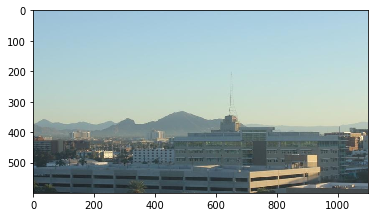

In [9]:
std_train_data = standardise(train_data)

selected_image = std_train_data[0]
image = 0
label = 1

print('Shape: ', selected_image[image].shape)
print('Label: ', selected_image[label])
plt.imshow(selected_image[image])